In [72]:
#CLASSIFYING PERSONAL INCOME

#to work with datframes
import pandas as pd

#to perform numerical operations
import numpy as np

#to visualize the data
import seaborn as sns

#to partion the data
from sklearn.model_selection import train_test_split

#importing library for logestic regression
from sklearn.linear_model import LogisticRegression

#importing performance metrics - accuracy , score and confusion metrics
from sklearn.metrics import accuracy_score , confusion_matrix

In [8]:
#importing the dataset 

df = pd.read_csv(r'C:\Users\SWAPNIL BISWAS\DATASETS\income.csv')
print(df)

       age       JobType         EdType        maritalstatus  \
0       45       Private        HS-grad             Divorced   
1       24   Federal-gov        HS-grad        Never-married   
2       44       Private   Some-college   Married-civ-spouse   
3       27       Private            9th        Never-married   
4       20       Private   Some-college        Never-married   
...    ...           ...            ...                  ...   
31973   34     Local-gov        HS-grad        Never-married   
31974   34     Local-gov   Some-college        Never-married   
31975   23       Private   Some-college   Married-civ-spouse   
31976   42     Local-gov   Some-college   Married-civ-spouse   
31977   29       Private      Bachelors        Never-married   

             occupation     relationship    race   gender  capitalgain  \
0          Adm-clerical    Not-in-family   White   Female            0   
1          Armed-Forces        Own-child   White     Male            0   
2        

In [12]:
#creating a copy of the dataset
data = df.copy()
print(data)

       age       JobType         EdType        maritalstatus  \
0       45       Private        HS-grad             Divorced   
1       24   Federal-gov        HS-grad        Never-married   
2       44       Private   Some-college   Married-civ-spouse   
3       27       Private            9th        Never-married   
4       20       Private   Some-college        Never-married   
...    ...           ...            ...                  ...   
31973   34     Local-gov        HS-grad        Never-married   
31974   34     Local-gov   Some-college        Never-married   
31975   23       Private   Some-college   Married-civ-spouse   
31976   42     Local-gov   Some-college   Married-civ-spouse   
31977   29       Private      Bachelors        Never-married   

             occupation     relationship    race   gender  capitalgain  \
0          Adm-clerical    Not-in-family   White   Female            0   
1          Armed-Forces        Own-child   White     Male            0   
2        

In [15]:
#printing the information of the datset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [18]:
#checking the miss variables
data.isnull()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,False,False,False,False,False,False,False,False,False,False,False,False,False
31974,False,False,False,False,False,False,False,False,False,False,False,False,False
31975,False,False,False,False,False,False,False,False,False,False,False,False,False
31976,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
#since it is difficult to find out the missing values among 31978 entries so we are gonna perform the operation
data.isnull().sum()

# !!no missing values in the dataset

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [22]:
#summary of the numerical variables
summary_num = data.describe()
print(summary_num)

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [33]:
#summary of the catergorical numerical
summary_cate = data.describe(include = "O")
print(summary_cate)

#count - gives us the info about how many obs are considered while taking the summary
#unique - how many unique values are present under that category
#top - most frequently occuring category
#freq - gives the frequency of the dataset

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


In [36]:
#finding the frequencies of each category
data['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [38]:
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [39]:
#checking the unique classes
print(np.unique(data['JobType']))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [55]:
df = pd.read_csv(r'C:\Users\SWAPNIL BISWAS\DATASETS\income.csv' , na_values = [" ?"])
print(df)

       age       JobType         EdType        maritalstatus  \
0       45       Private        HS-grad             Divorced   
1       24   Federal-gov        HS-grad        Never-married   
2       44       Private   Some-college   Married-civ-spouse   
3       27       Private            9th        Never-married   
4       20       Private   Some-college        Never-married   
...    ...           ...            ...                  ...   
31973   34     Local-gov        HS-grad        Never-married   
31974   34     Local-gov   Some-college        Never-married   
31975   23       Private   Some-college   Married-civ-spouse   
31976   42     Local-gov   Some-college   Married-civ-spouse   
31977   29       Private      Bachelors        Never-married   

             occupation     relationship    race   gender  capitalgain  \
0          Adm-clerical    Not-in-family   White   Female            0   
1          Armed-Forces        Own-child   White     Male            0   
2        

In [56]:
#DATA PREPROCESSING
data.isnull().sum()

missing = data[data.isnull().any(axis=1)]
print(missing)

#axis=1 => to cosider at least one column value is missing

Empty DataFrame
Columns: [age, JobType, EdType, maritalstatus, occupation, relationship, race, gender, capitalgain, capitalloss, hoursperweek, nativecountry, SalStat]
Index: []


In [57]:
x = data.dropna(axis=0)
print(x)

       age       JobType         EdType        maritalstatus  \
0       45       Private        HS-grad             Divorced   
1       24   Federal-gov        HS-grad        Never-married   
2       44       Private   Some-college   Married-civ-spouse   
3       27       Private            9th        Never-married   
4       20       Private   Some-college        Never-married   
...    ...           ...            ...                  ...   
31973   34     Local-gov        HS-grad        Never-married   
31974   34     Local-gov   Some-college        Never-married   
31975   23       Private   Some-college   Married-civ-spouse   
31976   42     Local-gov   Some-college   Married-civ-spouse   
31977   29       Private      Bachelors        Never-married   

             occupation     relationship    race   gender  capitalgain  \
0          Adm-clerical    Not-in-family   White   Female            0   
1          Armed-Forces        Own-child   White     Male            0   
2        

In [59]:
#relationship between the independent variables
correaltion = print(x.corr())

#correaltion value => -1 to +1

#if the correlation value comes zero that means none of the value is related with each other

#if the correlation value comes 1 then there is strong relationship between the two variables

                   age  capitalgain  capitalloss  hoursperweek
age           1.000000     0.077490     0.057282      0.068299
capitalgain   0.077490     1.000000    -0.031499      0.079112
capitalloss   0.057282    -0.031499     1.000000      0.053106
hoursperweek  0.068299     0.079112     0.053106      1.000000


In [63]:
#extracting the column names
x.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [64]:
#gender proportion table

gender = pd.crosstab(index = x["gender"] , columns = "count" , normalize = True)
print(gender)

#normalize = True => normalizes its values between 0 and 1. It then returns an output array with the same dimensions as the input.

#crosstab function => a cross-tabulation table that can show the frequency with which certain groups of data appear.

col_0       count
gender           
 Female  0.331728
 Male    0.668272


In [68]:
#gender vs salary status

gender_salarystat = pd.crosstab(index = x["gender"] , columns = x["SalStat"] , margins = True , normalize = 'index')
print(gender_salarystat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.109540                       0.890460
 Male                0.305709                       0.694291
All                  0.240634                       0.759366


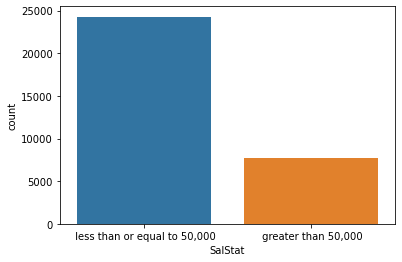

In [69]:
#freqeuncy distribution of salary status
SalStat = sns.countplot(x['SalStat'])

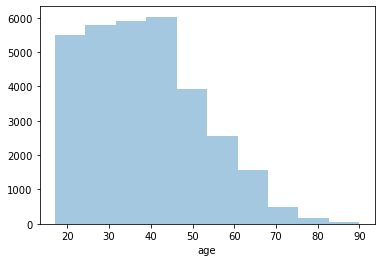

In [77]:
#histogram of age
sns.distplot(x['age'] , bins = 10 , kde = False)

SalStat
 greater than 50,000             44
 less than or equal to 50,000    34
Name: age, dtype: int64

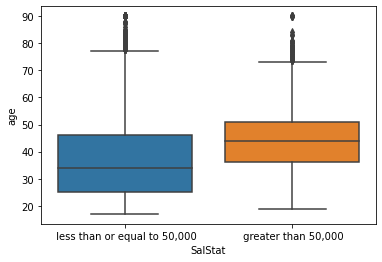

In [78]:
#BOX PLOT - AGE VS SALARY STATUS
sns.boxplot('SalStat' , 'age' , data = x)
x.groupby('SalStat')['age'].median()